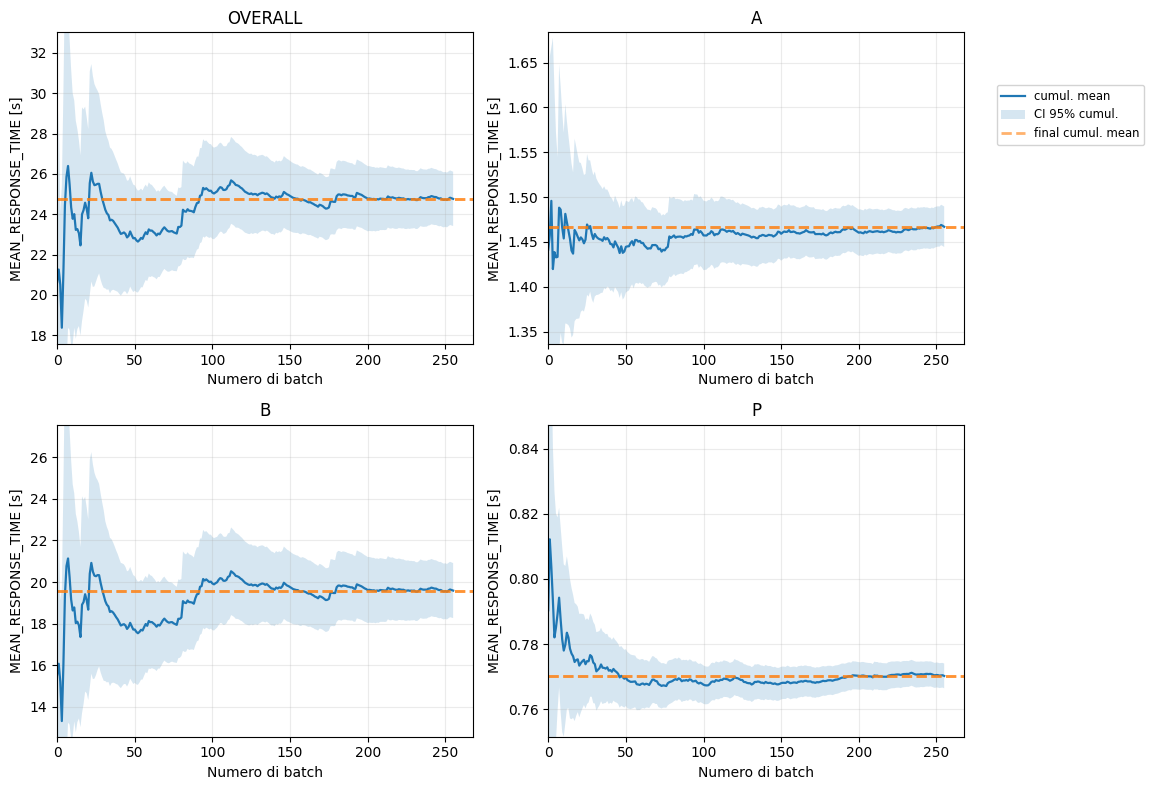

λ = 1.2 — Media cumulativa e CI 95% (tra batch)
- OVERALL  N=256  mean=24.7614  CI95=[23.3591, 26.1636]  ±1.40224  (±5.66%)
- A        N=256  mean=1.46689  CI95=[1.44337, 1.49041]  ±0.0235219  (±1.60%)
- B        N=256  mean=19.5899  CI95=[18.2118, 20.968]  ±1.37809  (±7.03%)
- P        N=256  mean=0.770243  CI95=[0.766289, 0.774198]  ±0.00395445  (±0.51%)
     SCOPE  N_BATCH   CUM_MEAN        SE  TCRIT  HALF_WIDTH      CI_LO  \
0  OVERALL      256  24.761381  0.686702  2.042    1.402245  23.359136   
1        A      256   1.466890  0.011519  2.042    0.023522   1.443368   
2        B      256  19.589879  0.674870  2.042    1.378085  18.211794   
3        P      256   0.770243  0.001937  2.042    0.003954   0.766289   

       CI_HI  REL_HALF_WIDTH_PCT  
0  26.163625            5.663030  
1   1.490412            1.603523  
2  20.967964            7.034680  
3   0.774198            0.513402  


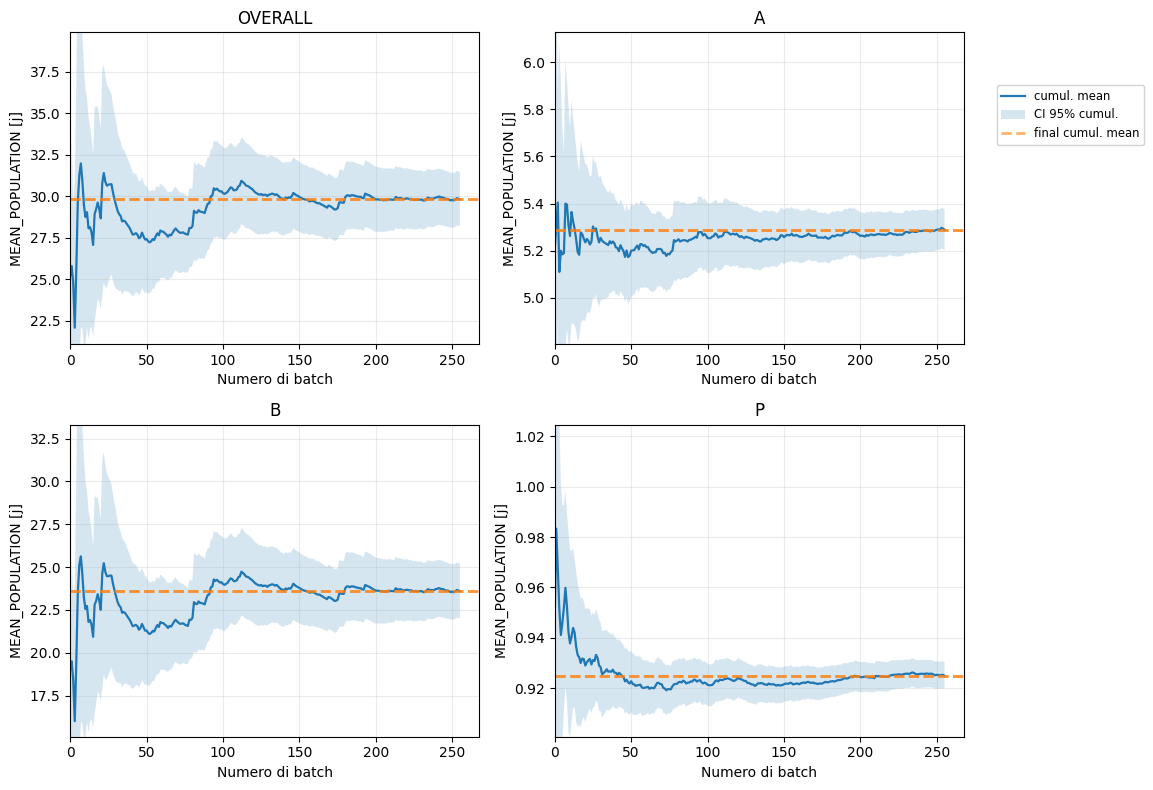

λ = 1.2 — Media cumulativa e CI 95% (tra batch)
- OVERALL  N=256  mean=29.8122  CI95=[28.1083, 31.5162]  ±1.70392  (±5.72%)
- A        N=256  mean=5.28864  CI95=[5.19808, 5.3792]  ±0.0905597  (±1.71%)
- B        N=256  mean=23.5987  CI95=[21.9293, 25.268]  ±1.66935  (±7.07%)
- P        N=256  mean=0.924954  CI95=[0.919359, 0.93055]  ±0.00559516  (±0.60%)
     SCOPE  N_BATCH   CUM_MEAN        SE  TCRIT  HALF_WIDTH      CI_LO  \
0  OVERALL      256  29.812247  0.834439  2.042    1.703924  28.108323   
1        A      256   5.288640  0.044349  2.042    0.090560   5.198080   
2        B      256  23.598653  0.817509  2.042    1.669354  21.929298   
3        P      256   0.924954  0.002740  2.042    0.005595   0.919359   

       CI_HI  REL_HALF_WIDTH_PCT  
0  31.516171            5.715516  
1   5.379200            1.712345  
2  25.268007            7.073939  
3   0.930550            0.604912  


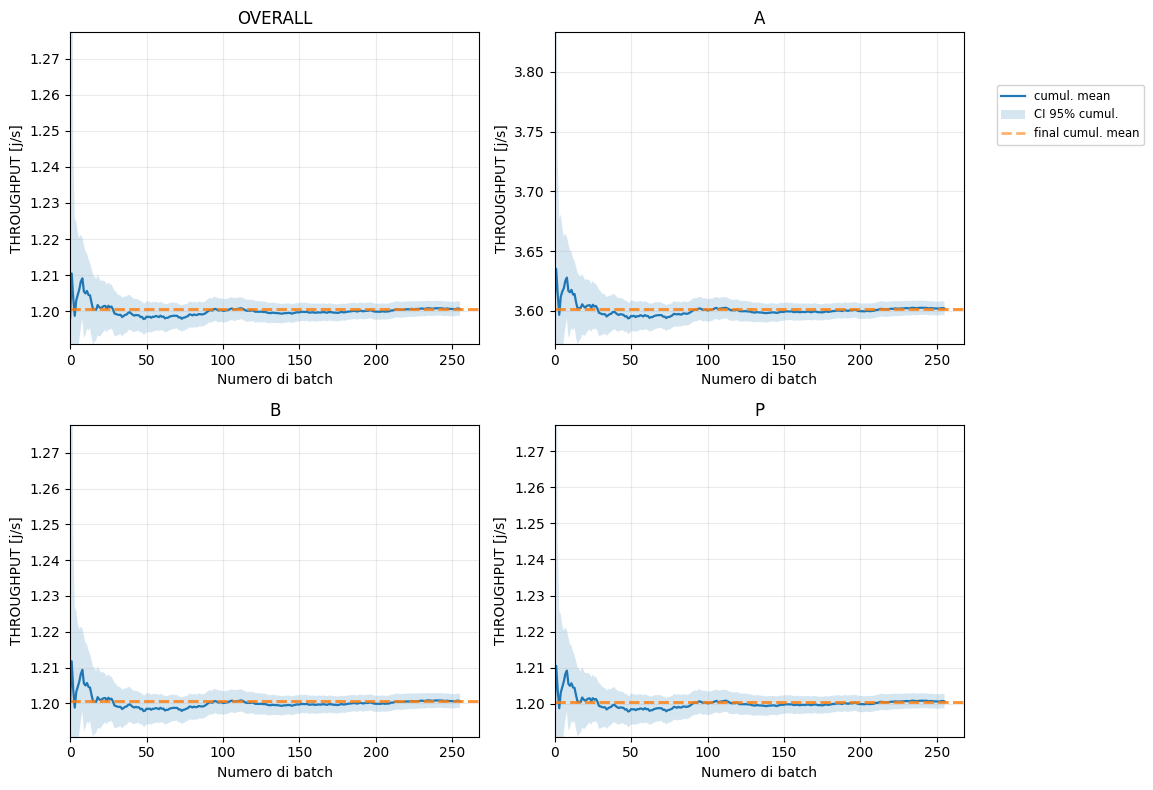

λ = 1.2 — Media cumulativa e CI 95% (tra batch)
- OVERALL  N=256  mean=1.2006  CI95=[1.19851, 1.20269]  ±0.00209007  (±0.17%)
- A        N=256  mean=3.6018  CI95=[3.59577, 3.60782]  ±0.0060243  (±0.17%)
- B        N=256  mean=1.2006  CI95=[1.1985, 1.2027]  ±0.00210136  (±0.18%)
- P        N=256  mean=1.2006  CI95=[1.1985, 1.20269]  ±0.00209361  (±0.17%)
     SCOPE  N_BATCH  CUM_MEAN        SE  TCRIT  HALF_WIDTH     CI_LO  \
0  OVERALL      256  1.200596  0.001024  2.042    0.002090  1.198506   
1        A      256  3.601798  0.002950  2.042    0.006024  3.595773   
2        B      256  1.200601  0.001029  2.042    0.002101  1.198500   
3        P      256  1.200598  0.001025  2.042    0.002094  1.198504   

      CI_HI  REL_HALF_WIDTH_PCT  
0  1.202686            0.174086  
1  3.607822            0.167258  
2  1.202702            0.175026  
3  1.202691            0.174380  


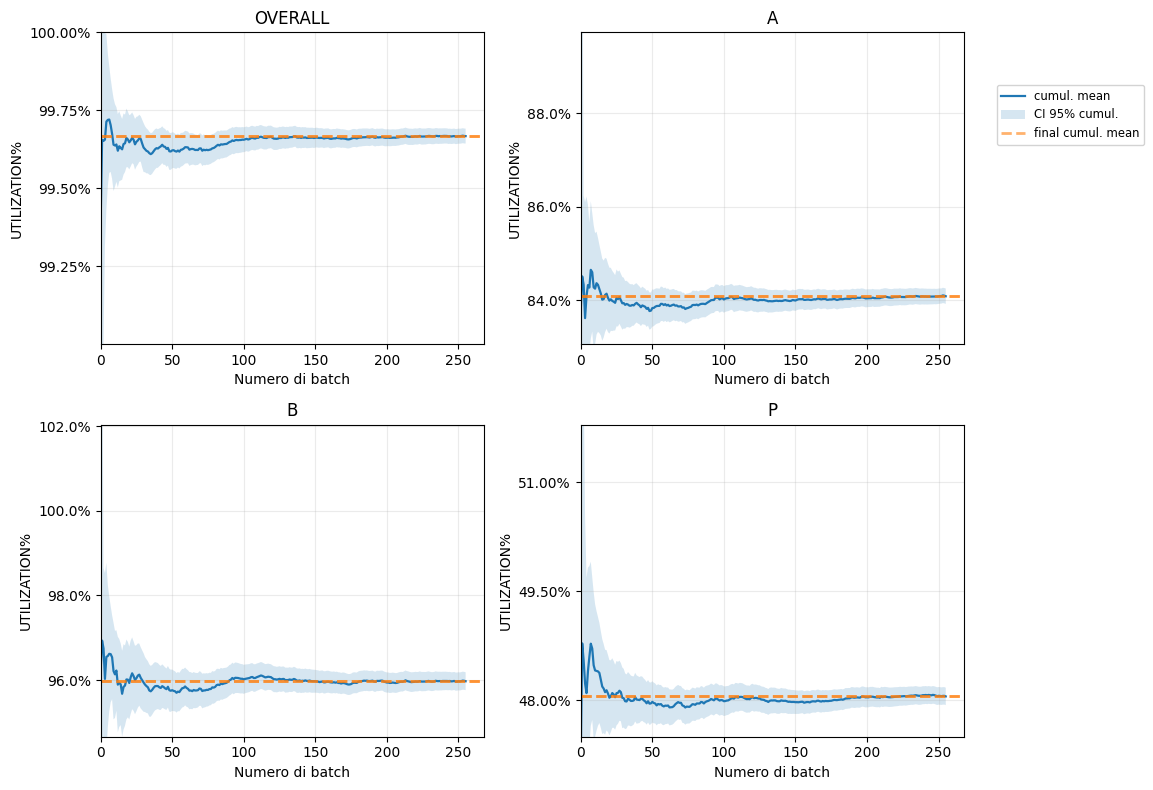

λ = 1.2 — Media cumulativa e CI 95% (tra batch)
- OVERALL  N=256  mean=0.996676  CI95=[0.996428, 0.996925]  ±0.000248232  (±0.02%)
- A        N=256  mean=0.840812  CI95=[0.839095, 0.84253]  ±0.00171777  (±0.20%)
- B        N=256  mean=0.959733  CI95=[0.957522, 0.961944]  ±0.00221104  (±0.23%)
- P        N=256  mean=0.480551  CI95=[0.479297, 0.481804]  ±0.00125315  (±0.26%)
     SCOPE  N_BATCH  CUM_MEAN        SE  TCRIT  HALF_WIDTH     CI_LO  \
0  OVERALL      256  0.996676  0.000122  2.042    0.000248  0.996428   
1        A      256  0.840812  0.000841  2.042    0.001718  0.839095   
2        B      256  0.959733  0.001083  2.042    0.002211  0.957522   
3        P      256  0.480551  0.000614  2.042    0.001253  0.479297   

      CI_HI  REL_HALF_WIDTH_PCT  
0  0.996925            0.024906  
1  0.842530            0.204299  
2  0.961944            0.230381  
3  0.481804            0.260773  
λ = 1.2 — Media cumulativa e CI 95% (tra batch)
- OVERALL  N=256  mean=24.7614  CI95=[23.3591

In [3]:
# ---- aggiungi in cima al file (se non l'hai già) ----
from pathlib import Path
from glob import glob
from typing import Union, Sequence, Optional, Tuple
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 

def _resolve_glob_path(p) -> Path:
    """Accetta path o pattern con wildcard e ritorna il file più recente."""
    p = str(p)
    if any(ch in p for ch in "*?[]"):
        matches = [Path(m) for m in glob(p)]
        if not matches:
            raise FileNotFoundError(f"Nessun file corrisponde al pattern: {p}")
        return max(matches, key=lambda m: m.stat().st_mtime)  # più recente
    return Path(p)


def summarize_cum_mean_ci(
    csv_input: Union[str, Path, pd.DataFrame],
    lam: float,
    *,
    scopes: Sequence[str] = ("OVERALL", "A", "B", "P"),
    confidence: float = 0.95,
    save_csv: Optional[Union[str, Path]] = None,
    print_summary: bool = True,
    column_name: str = "MEAN_POPULATION",
) -> pd.DataFrame:
    """
    Calcola, per ciascuno scope, la media cumulativa del MEAN_RESPONSE_TIME sui batch
    e la relativa CI al 95% (t-Student), assumendo batch-mean circa indipendenti.

    Ritorna un DataFrame con colonne:
      SCOPE, N_BATCH, CUM_MEAN, SE, TCRIT, HALF_WIDTH, CI_LO, CI_HI, REL_HALF_WIDTH_PCT

    Parametri
    ---------
    csv_input : percorso al CSV o DataFrame con colonne:
        SCOPE, ARRIVAL_RATE, BATCH_NUM, MEAN_RESPONSE_TIME, ...
    lam : float
        Tasso di arrivo per il filtro (ARRIVAL_RATE ≈ lam).
    scopes : sequenza degli scope da includere.
    confidence : livello di confidenza (solo 0.95 supportato qui).
    save_csv : se valorizzato, salva la tabella su CSV in quel percorso.
    print_summary : se True, stampa una tabella leggibile.

    Note
    ----
    t-critico calcolato su gradi di libertà df = n-1: per df<=30 tabellato, altrimenti 1.96.
    """

    # --- tabella t-critico per 95% (df = 1..30) ---
    _T95 = {
        1:12.706, 2:4.303, 3:3.182, 4:2.776, 5:2.571, 6:2.447, 7:2.365, 8:2.306, 9:2.262,
        10:2.228, 11:2.201, 12:2.179, 13:2.160, 14:2.145, 15:2.131, 16:2.120, 17:2.110,
        18:2.101, 19:2.093, 20:2.086, 21:2.080, 22:2.074, 23:2.069, 24:2.064, 25:2.060,
        26:2.056, 27:2.052, 28:2.048, 29:2.045, 30:2.042
    }
    def _tcrit95_from_n(n: int) -> float:
        """Ritorna tcrit per CI95 con df=n-1 (n >= 1)."""
        if n <= 1:
            return _T95[1]
        df = n - 1
        return _T95.get(min(df, 30), 1.96)
    
    # --- lettura/filtro ---
    # se csv_input non è già un DataFrame, risolvi il pattern
    # ---- dentro plot_mean_rt_grid4_ci(...) sostituisci il blocco di lettura con questo ----
    # csv_input può essere DataFrame o un (pattern di) path
    if isinstance(csv_input, pd.DataFrame):
        df = csv_input.copy()
        src = "<DataFrame>"
    else:
        csv_path = _resolve_glob_path(csv_input)   # <<< risolve *.csv
        df = pd.read_csv(csv_path)
        src = str(csv_path)

    # tipizzazione campi necessari (usa la colonna richiesta)
    required = {"SCOPE", "ARRIVAL_RATE", "BATCH_NUM", column_name}
    missing = required - set(df.columns)
    if missing:
        raise KeyError(f"Mancano colonne {missing} in {src}")

    df["ARRIVAL_RATE"] = pd.to_numeric(df["ARRIVAL_RATE"], errors="coerce")
    df["BATCH_NUM"]    = pd.to_numeric(df["BATCH_NUM"],    errors="coerce")
    df[column_name]    = pd.to_numeric(df[column_name],    errors="coerce")


    df["ARRIVAL_RATE"] = pd.to_numeric(df["ARRIVAL_RATE"], errors="coerce")
    df["BATCH_NUM"]    = pd.to_numeric(df["BATCH_NUM"], errors="coerce")
    df["MEAN_RESPONSE_TIME"] = pd.to_numeric(df[column_name], errors="coerce")

    mask_lam = np.isclose(df["ARRIVAL_RATE"].astype(float), float(lam), rtol=1e-6, atol=1e-9)
    dfl = df.loc[mask_lam].dropna(subset=["SCOPE", "BATCH_NUM", column_name])
    if dfl.empty:
        raise ValueError(f"Nessun dato per ARRIVAL_RATE ≈ {lam}")

    rows = []
    for sc in scopes:
        dsc = dfl[dfl["SCOPE"] == sc].sort_values("BATCH_NUM")
        if dsc.empty:
            continue

        y = dsc[column_name].to_numpy(dtype=float)
        n = int(len(y))
        # media cumulativa finale
        cum_mean = float(pd.Series(y, dtype=float).expanding().mean().iloc[-1])

        # stima std campionaria su tutti i batch e SE = s / sqrt(n)
        s = float(pd.Series(y, dtype=float).std(ddof=1)) if n > 1 else 0.0
        se = s / np.sqrt(n) if n > 0 else float("nan")

        tcrit = _tcrit95_from_n(n)
        hw = tcrit * se
        lo = cum_mean - hw
        hi = cum_mean + hw
        rel_hw_pct = (hw / cum_mean * 100.0) if cum_mean != 0 else float("inf")

        rows.append({
            "SCOPE": sc,
            "N_BATCH": n,
            "CUM_MEAN": cum_mean,
            "SE": se,
            "TCRIT": tcrit,
            "HALF_WIDTH": hw,
            "CI_LO": lo,
            "CI_HI": hi,
            "REL_HALF_WIDTH_PCT": rel_hw_pct,
        })

    out_df = pd.DataFrame(rows, columns=[
        "SCOPE","N_BATCH","CUM_MEAN","SE","TCRIT","HALF_WIDTH","CI_LO","CI_HI","REL_HALF_WIDTH_PCT"
    ])

    if save_csv is not None:
        save_csv = Path(save_csv)
        save_csv.parent.mkdir(parents=True, exist_ok=True)
        out_df.to_csv(save_csv, index=False)

    if print_summary and not out_df.empty:
        # stampa compatta
        print(f"λ = {lam} — Media cumulativa e CI 95% (tra batch)")
        for _, r in out_df.iterrows():
            print(
                f"- {r['SCOPE']:<8} N={int(r['N_BATCH'])}  "
                f"mean={r['CUM_MEAN']:.6g}  "
                f"CI95=[{r['CI_LO']:.6g}, {r['CI_HI']:.6g}]  "
                f"±{r['HALF_WIDTH']:.6g}  "
                f"(±{r['REL_HALF_WIDTH_PCT']:.2f}%)"
            )

    return out_df



from pathlib import Path
import matplotlib.pyplot as plt

def add_global_legend(fig: plt.Figure,
                      handles_labels,
                      *,
                      loc="center left",
                      bbox_to_anchor=(0.86, 0.5),
                      ncol=1,
                      fontsize="small",
                      framealpha=0.85):
    """Aggiunge una legenda globale con (handle, label) unici."""
    if not handles_labels:
        return
    # deduplica per label, preservando l’ordine
    seen = set()
    uniq_handles, uniq_labels = [], []
    for h, lab in handles_labels:
        if lab not in seen and lab not in (None, "_nolegend_"):
            seen.add(lab)
            uniq_handles.append(h)
            uniq_labels.append(lab)
    fig.legend(uniq_handles, uniq_labels,
               loc=loc, bbox_to_anchor=bbox_to_anchor,
               ncol=ncol, fontsize=fontsize, framealpha=framealpha)
    
    

def save_all_batch_plots(
    csv_input,
    lam: float,
    outdir: Union[str, Path] = ".output_simulation",
    scopes=("OVERALL", "A", "B", "P"),
    dpi: int = 600,
):
    """
    Salva i 4 grafici (RT, N, X, ρ) in PNG dentro 'outdir'.
    Ritorna la lista dei path salvati.
    """
    outdir = Path(outdir)
    outdir.mkdir(parents=True, exist_ok=True)

    specs = [
        ("MEAN_RESPONSE_TIME", " [s]",   "batch_mean_rt"),
        ("MEAN_POPULATION",    " [j]",   "batch_mean_pop"),
        ("THROUGHPUT",         " [j/s]", "batch_throughput"),
        ("UTILIZATION",        " %",     "batch_utilization"),
    ]

    saved = []
    for col, unit, slug in specs:
        target = outdir / f"{slug}_lam{lam:g}.png"
        fig, axs = plot_mean_rt_grid4_ci(
            csv_input,
            lam,
            scopes=scopes,
            save_path=target,   # <-- salva qui
            show=False,         # <-- non aprire finestra
            column_name=col,
            tipologia=unit
        )
        # fig è già salvato dentro la funzione; per coerenza chiudiamo
        plt.close(fig)
        saved.append(str(target))

    return saved






def plot_mean_rt_grid4_ci(
    csv_input: Union[str, Path, pd.DataFrame],
    lam: float,
    *,
    scopes: Sequence[str] = ("OVERALL", "A", "B", "P"),
    suptitle: Optional[str] = None,
    save_path: Optional[Union[str, Path]] = None,
    show: bool = True,
    column_name: str = "MEAN_RESPONSE_TIME",
    tipologia: str = "[s]",
     global_legend: bool = True,        # <-- nuovo
    legend_cols: int = 1               # <-- opzionale
) -> Tuple[plt.Figure, np.ndarray]:
    """
    Crea una griglia 2×2; ogni subplot contiene:
      - la serie per-batch del MEAN_RESPONSE_TIME,
      - la media cumulativa sui batch (expanding mean),
      - la banda di confidenza al 95% per la media cumulativa (t-Student).

    La CI è “tra batch”: al passo k si usa la distribuzione dei k batch-mean
    (assunti circa indipendenti per costruzione dei batch).

    Parametri
    ---------
    csv_input : str | Path | pd.DataFrame
        CSV o DataFrame con colonne: SCOPE, ARRIVAL_RATE, BATCH_NUM, MEAN_RESPONSE_TIME, ...
    lam : float
        Valore di ARRIVAL_RATE da filtrare (confronto tollerante).
    scopes : Sequence[str]
        Scope da plottare (ordine dei subplot). Max 4.
    suptitle : str | None
        Titolo complessivo.
    save_path : str | Path | None
        Se impostato, salva l’immagine nel percorso indicato.
    show : bool
        Se True, mostra la figura con plt.show().

    Ritorna
    -------
    fig, axs : (Figure, array di Axes)
    """

    # ---------------- utilità per t-critico a 95% ----------------
    _T95 = {
        1:12.706, 2:4.303, 3:3.182, 4:2.776, 5:2.571, 6:2.447, 7:2.365, 8:2.306, 9:2.262,
        10:2.228, 11:2.201, 12:2.179, 13:2.160, 14:2.145, 15:2.131, 16:2.120, 17:2.110,
        18:2.101, 19:2.093, 20:2.086, 21:2.080, 22:2.074, 23:2.069, 24:2.064, 25:2.060,
        26:2.056, 27:2.052, 28:2.048, 29:2.045, 30:2.042
    }
    def _tcrit_95(n: int) -> float:
        df = max(1, int(n) - 1)  # <-- df = n-1
        return _T95.get(min(df, 30), 1.96) if df <= 30 else 1.96


    
    # ---- dentro plot_mean_rt_grid4_ci(...) sostituisci il blocco di lettura con questo ----
    # csv_input può essere DataFrame o un (pattern di) path
    if isinstance(csv_input, pd.DataFrame):
        df = csv_input.copy()
        src = "<DataFrame>"
    else:
        csv_path = _resolve_glob_path(csv_input)   # <<< risolve *.csv
        df = pd.read_csv(csv_path)
        src = str(csv_path)

    # tipizzazione campi necessari (usa la colonna richiesta)
    required = {"SCOPE", "ARRIVAL_RATE", "BATCH_NUM", column_name}
    missing = required - set(df.columns)
    if missing:
        raise KeyError(f"Mancano colonne {missing} in {src}")

    df["ARRIVAL_RATE"] = pd.to_numeric(df["ARRIVAL_RATE"], errors="coerce")
    df["BATCH_NUM"]    = pd.to_numeric(df["BATCH_NUM"],    errors="coerce")
    df[column_name]    = pd.to_numeric(df[column_name],    errors="coerce")

        
    

    # tipizzazione campi necessari
    df["ARRIVAL_RATE"] = pd.to_numeric(df["ARRIVAL_RATE"], errors="coerce")
    df["BATCH_NUM"]    = pd.to_numeric(df["BATCH_NUM"],    errors="coerce")
    df[column_name] = pd.to_numeric(df[column_name], errors="coerce")

    # filtro per λ con tolleranza numerica
    mask_lam = np.isclose(df["ARRIVAL_RATE"].astype(float), float(lam), rtol=1e-6, atol=1e-9)
    dfl = df.loc[mask_lam].dropna(subset=["SCOPE", "BATCH_NUM", column_name])
    if dfl.empty:
        raise ValueError(f"Nessun dato per ARRIVAL_RATE ≈ {lam}")

    # ---------------- griglia 2×2 ----------------
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    axs = axs.ravel()

    handles_labels=[]
    
    for i, sc in enumerate(scopes[:4]):
        ax = axs[i]
        dsc = dfl[dfl["SCOPE"] == sc].sort_values("BATCH_NUM")
        if dsc.empty:
            ax.text(0.5, 0.5, f"Nessun dato per '{sc}' (λ={lam})",
                    ha="center", va="center", transform=ax.transAxes)
            ax.set_axis_off()
            continue

        # x = indice dei batch; y = mean per-batch
        x = dsc["BATCH_NUM"].to_numpy()
        y = dsc[column_name].to_numpy(dtype=float)

        # serie per-batch
        #ax.plot(x, y, linewidth=1.2, label="batch mean")

        # media cumulativa e IC cumulativa (tra batch)
        s = pd.Series(y, dtype=float)
        cum_mean = s.expanding().mean()
        cum_std  = s.expanding().std(ddof=1)        # std campionaria
        n = np.arange(1, len(s) + 1, dtype=float)
        se = (cum_std / np.sqrt(n)).fillna(0.0)     # se(1)=0

        tcrit = np.array([_tcrit_95(int(k)) for k in n], dtype=float)
        half_width = tcrit * se

        lo = (cum_mean - half_width).to_numpy()
        hi = (cum_mean + half_width).to_numpy()

        # plotti cumulativi sulla stessa asse x (BATCH_NUM)
      # tracce (con label, così la legenda le vede)
        h_mean, = ax.plot(x, cum_mean.to_numpy(), linewidth=1.6, label="cumul. mean")
        h_band  = ax.fill_between(x, lo, hi, alpha=0.18, label="CI 95% cumul.")
        m_final = float(cum_mean.iloc[-1])
        h_hline = ax.axhline(m_final, linestyle="--", linewidth=2.0, alpha=0.6,
                             label="final cumul. mean", color="tab:orange")

        # accumula handle/label solo dal PRIMO subplot valido
        if not handles_labels:
            handles_labels.extend([(h_mean, h_mean.get_label()),
                                   (h_band,  h_band.get_label()),
                                   (h_hline, h_hline.get_label())])
        # aspetto
        ax.set_title(sc)
        ax.set_xlabel("Numero di batch")
        ax.set_ylabel(column_name+tipologia)
        ax.grid(True, alpha=0.25)
        ax.set_xlim(left=0)
        k0 = 10
        ywin_lo = np.nanmin(lo[k0:]);  ywin_hi = np.nanmax(hi[k0:])
      
        ax.set_ylim(max(0, ywin_lo), ywin_hi * 1.05)
        
    
        
        m_final = float(cum_mean.iloc[-1])
        ax.axhline(m_final, linestyle="--", linewidth=2.0, alpha=0.6, label="final cumul. mean", color="tab:orange")
        
        
        
        if column_name.upper() == "UTILIZATION":
            ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
            ax.yaxis.set_major_locator(mtick.MaxNLocator(4))

            if sc == "OVERALL":   # zoom forte intorno al valore finale
                span = float(np.nanmax(hi[k0:]) - np.nanmin(lo[k0:]))
                if not np.isfinite(span) or span <= 0:
                    span = 0.0005
                half = max(0.001, 2.5 * span)
                low = max(0.0, m_final - half)
                high = min(1.0, m_final + half)
                ax.set_ylim(low, high)
        
        
        
        # se vuoi confronti più puliti tra subplot:
        # for a in axs: a.sharey(axs[0])  # oppure set_same_y = True su coppie


        #ax.legend(loc="best", fontsize="small")

    # spegni assi non usati se <4 scope
        # spegni assi non usati se <4 scope
    for j in range(len(scopes[:4]), 4):
        axs[j].set_axis_off()

    plt.tight_layout(rect=(0, 0, 1, 0.96))


    # spazio per la legenda a destra
    fig.subplots_adjust(right=0.82)
    if global_legend:
        add_global_legend(fig, handles_labels,
                          loc="center left", bbox_to_anchor=(0.83, 0.85),
                          ncol=legend_cols)

    plt.tight_layout(rect=(0, 0, 0.82, 1))
    # >>> SALVA se richiesto (prima di show)
    if save_path is not None:
        save_path = Path(save_path)
        save_path.parent.mkdir(parents=True, exist_ok=True)
        fig.savefig(save_path, bbox_inches="tight", dpi=600)

    if show:
        plt.show()
    else:
        plt.close(fig)

    # >>> usa lam (non 1.2 fisso)
    df_summary = summarize_cum_mean_ci(csv_input, lam, column_name=column_name)
    print(df_summary)

    return fig, axs


lambda_val = 1.2
csv_input = Path(".output_simulation/*batch.csv")
plot_mean_rt_grid4_ci(csv_input,lambda_val, column_name="MEAN_RESPONSE_TIME", tipologia=" [s]")
plot_mean_rt_grid4_ci(csv_input,lambda_val, column_name="MEAN_POPULATION", tipologia=" [j]")
plot_mean_rt_grid4_ci(csv_input,lambda_val, column_name="THROUGHPUT", tipologia=" [j/s]")
plot_mean_rt_grid4_ci(csv_input,lambda_val, column_name="UTILIZATION", tipologia="%")




saved = save_all_batch_plots(csv_input, lam=lambda_val, outdir=".output_simulation")
print("Salvati:")
for p in saved:
    print(" -", p)